#### Импортируем все библиотеки. Пока не изучил данные и не определился, какую лучше использовать

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
# так графики более корректно отображаются на ip
plt.style.use('default') #для лучшего отображения на темном фоне

import seaborn as sns
sns.set_theme(style="whitegrid")

import plotly
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

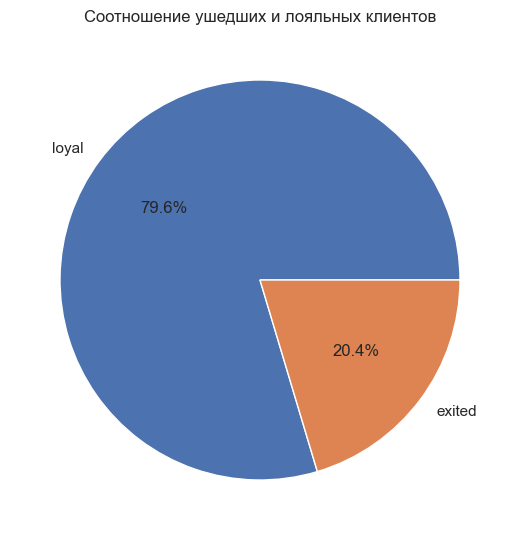

In [3]:
churn_data_ex = churn_data['Exited'].value_counts() # считаем число
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_data_ex, #значения
    labels= ['loyal','exited'], #подписи
    autopct='%.1f%%', #формат выведения процента
#    explode=[0.1,0.05,0,0,0,0,0,0,0,0] #это отступы кусочков
    );
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=12)

Соотношение лояльных и нелояльных примерно 80 на 20. Т.е. лояльны банку клиентов в базе в примерно 4 раза больше, чем нелояльных.
Сложно судить о том, хороший это показатель для бизнеса или нет т.к. для этого надо понимать показатели в сравнении с подобными показателями других банков, например. Но то, что по сути каждый 5ый клиент в базе ушел безусловно является поводом задуматься и разобраться почему.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [4]:
churn_data_balance = churn_data[churn_data['Balance']>2500]
churn_data_balance.head()
#axes.hist(
#    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
#)
#axes.set_title("Гистограмма заболеваемости в России")
#axes.xaxis.set_tick_params(rotation=30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
